CALCULO NUMERICO - ecuaciones analiticas


In [9]:
import sympy
from sympy import symbols, Function, Derivative, Matrix, sin, cos, pi, rad
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, Point, Particle, RigidBody
from matplotlib import pyplot as plt
import numpy as np
import scipy


C:\Users\mvare\AppData\Local\Temp\ipykernel_19292\1031784149.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(lista_de_valores[0], lista_de_valores[1], "b.", color="blue")


(np.float64(-1.1999486216200688),
 np.float64(3.1989210540214446),
 np.float64(-3.2994348378207565),
 np.float64(3.2994348378207565))

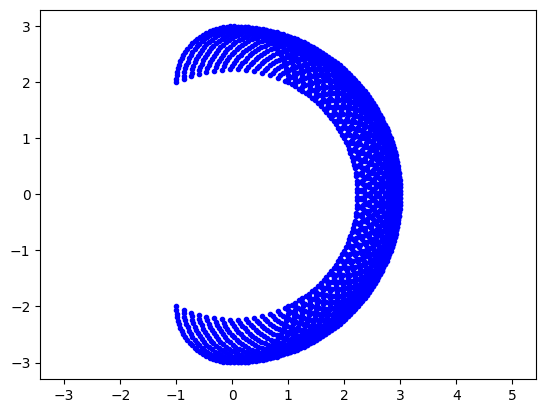

In [6]:
N = ReferenceFrame("N")
theta1 = dynamicsymbols("theta1")
theta2 = dynamicsymbols("theta2")
l1 = symbols("l1")  # longitud del primer brazo
l2 = symbols("l2")  # longitud del segundo brazo

A = N.orientnew("A", "Axis", [theta1, N.z])
B = A.orientnew("B", "Axis", [theta2, N.z])

r1 = l1 * A.x
r2 = l2 * B.x

p = r1+r2
p_exp = p.express(N).simplify()

#todo esto es simbolico, lo mejor es hacerlo numerico
params={l1:2, l2:1}
#creamos uina lista de expresiones
x_exp = p_exp.subs(params).dot(N.x)
y_exp = p_exp.subs(params).dot(N.y)
#creamos el lambdify para evaluar las expresiones
#lambdify permite evaluar expresiones simbolicas con valores numericos
#en este caso, x_exp y y_exp son funciones de theta1 y theta2
#y devuelve un vector de coordenadas (x,y)
calculadora = sympy.lambdify([theta1, theta2], [x_exp, y_exp])
for theta_1val in np.linspace(-np.pi/2, np.pi/2, 50):
    for theta_2val in np.linspace(-np.pi/2, np.pi/2, 50):
        lista_de_valores = calculadora(theta_1val, theta_2val)
        plt.plot(lista_de_valores[0], lista_de_valores[1], "b.", color="blue")
        
plt.axis("equal")


In [ ]:
params={l1:2, l2:1}
for theta_1val in np.linspace(-np.pi/2, np.pi/2, 10):
    for theta_2val in np.linspace(-np.pi/2, np.pi/2, 10):
        params[theta1] = theta_1val
        params[theta2] = theta_2val
        p_val = p_exp.subs(params) #esto bota un vector
        x = p_val.dot(N.x)
        y = p_val.dot(N.y)
        plt.plot(x, y, "o", color="blue")

In [ ]:
#lambda ==> definicion de una funcion anonima

#Podemos definir una funcion asi
def mi_funcion(x):
    return x**2
mi_funcion(1)

#Pero tambien la podemos definir como una funcion anonima con una variable
fun = lambda x: x**2 #creamos una funcion anonima
fun(1) #la podemos utilizar asi

#Lambdify, vuelve algo simbolico una funcion, esto permite que una expresion se vuelva una funcion y evaluarlo de forma numerica rapida
expr = l1**2
my_fun = sympy.lambdify(l1, expr)
my_fun(3)
#esto es muy rapido, no tiene que hacer sustituciones, eso ya lo hice lambdify, crea una calculadora



9

C:\Users\mvare\AppData\Local\Temp\ipykernel_19292\633216340.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(*zip(*pos_num), "b-", color="blue")  # Desempaquetar la lista de tuplas


(np.float64(2.4117098241154924),
 np.float64(2.9167794214059755),
 np.float64(-1.4730577251136114),
 np.float64(1.473155678536952))

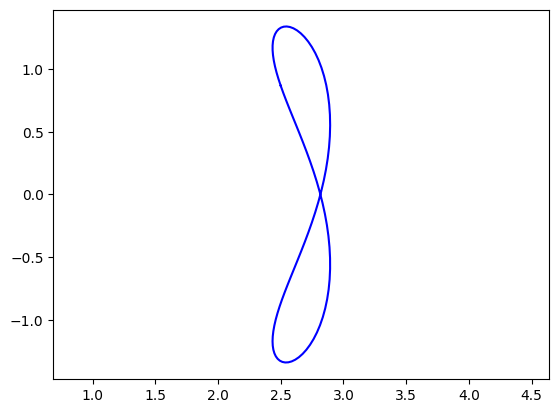

In [ ]:
#Grafica 1 
#Ahora theta1 y theta2 son funciones del tiempo
calculadora = sympy.lambdify([theta1, theta2], [x_exp, y_exp])
t_clase = np.linspace(0, 2*np.pi, 100)  # tiempo de 0 a 2pi
thetha1 = np.deg2rad(20) * np.sin(t_clase)  
thetha2 = np.deg2rad(60) * np.cos(t_clase)  

pos_num = []
for i in range(len(t_clase)):
    pos_num.append(calculadora(thetha1[i], thetha2[i]))
    
plt.plot(*zip(*pos_num), "b-", color="blue")  # Desempaquetar la lista de tuplas
plt.axis("equal")

C:\Users\mvare\AppData\Local\Temp\ipykernel_19292\946454184.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(*zip(*velocidad), "r-", color="red")  # Desempaquetar la lista de tuplas


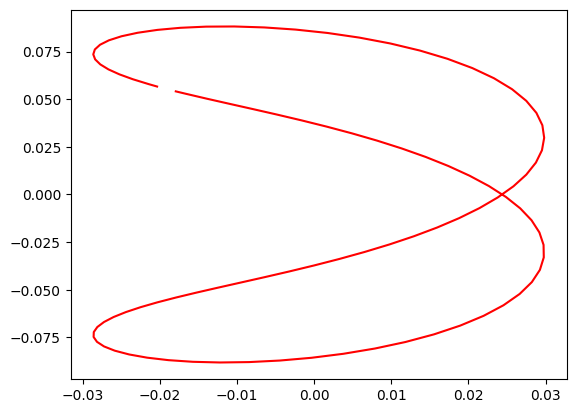

In [29]:
#grafica 2
  # Derivada numerica de la posicion, saca la derivada, esto da el delta X *100/2.npi es el delta t
velocidad = np.gradient(pos_num, axis=0)  # Derivada numerica de la posicion
plt.plot(*zip(*velocidad), "r-", color="red")  # Desempaquetar la lista de tuplas